Imported AIS data and displayed the first rows to verify data loading and column structure

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv("aisdk-2025-12-31.csv")

In [67]:
print(df.head())

           # Timestamp Type of mobile       MMSI   Latitude  Longitude  \
0  31/12/2025 00:00:00   Base Station    2190064  56.716575  11.519088   
1  31/12/2025 00:00:00   Base Station    2194006  55.538870   5.033200   
2  31/12/2025 00:00:00        Class B  219003513  56.194860  10.668912   
3  31/12/2025 00:00:00        Class B  219010487  57.120910   8.600703   
4  31/12/2025 00:00:00        Class A  220359000  57.494685  10.503837   

  Navigational status  ROT  SOG    COG  Heading  ... Length  \
0       Unknown value  NaN  NaN    NaN      NaN  ...    NaN   
1       Unknown value  NaN  NaN    NaN      NaN  ...    NaN   
2       Unknown value  NaN  0.0    NaN      NaN  ...    NaN   
3       Unknown value  NaN  0.0  197.4    197.0  ...    NaN   
4  Engaged in fishing  0.0  0.0  234.4    253.0  ...    NaN   

  Type of position fixing device Draught Destination  ETA  Data source type  \
0                            GPS     NaN     Unknown  NaN               AIS   
1                 

Checked dataset columns and data types to understand available vessel information.

In [68]:
print(df.columns)

Index(['# Timestamp', 'Type of mobile', 'MMSI', 'Latitude', 'Longitude',
       'Navigational status', 'ROT', 'SOG', 'COG', 'Heading', 'IMO',
       'Callsign', 'Name', 'Ship type', 'Cargo type', 'Width', 'Length',
       'Type of position fixing device', 'Draught', 'Destination', 'ETA',
       'Data source type', 'A', 'B', 'C', 'D'],
      dtype='str')


In [69]:
print(df.info())

<class 'pandas.DataFrame'>
RangeIndex: 14430503 entries, 0 to 14430502
Data columns (total 26 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   # Timestamp                     str    
 1   Type of mobile                  str    
 2   MMSI                            int64  
 3   Latitude                        float64
 4   Longitude                       float64
 5   Navigational status             str    
 6   ROT                             float64
 7   SOG                             float64
 8   COG                             float64
 9   Heading                         float64
 10  IMO                             str    
 11  Callsign                        str    
 12  Name                            str    
 13  Ship type                       str    
 14  Cargo type                      str    
 15  Width                           float64
 16  Length                          float64
 17  Type of position fixing device  str 

In [70]:
print(df.describe())

               MMSI      Latitude     Longitude           ROT           SOG  \
count  1.443050e+07  1.443050e+07  1.443050e+07  1.014246e+07  1.314334e+07   
mean   2.441351e+08  5.633311e+01  1.076614e+01 -6.746096e-04  4.744826e+00   
std    1.313067e+08  1.964515e+00  1.963267e+00  3.952319e+00  8.406420e+00   
min    3.638000e+03 -8.529608e+01 -8.539242e+01 -7.087000e+02  0.000000e+00   
25%    2.190031e+08  5.537224e+01  9.956960e+00  0.000000e+00  0.000000e+00   
50%    2.190316e+08  5.615199e+01  1.086861e+01  0.000000e+00  0.000000e+00   
75%    2.580590e+08  5.733197e+01  1.184341e+01  0.000000e+00  1.010000e+01   
max    9.926511e+08  9.100000e+01  9.647108e+01  7.087000e+02  1.540000e+02   

                COG       Heading         Width        Length       Draught  \
count  1.202659e+07  1.102332e+07  1.284954e+07  1.285109e+07  9.989948e+06   
mean   1.847013e+02  1.814532e+02  1.428131e+01  7.439102e+01  4.826569e+00   
std    1.098181e+02  1.039787e+02  1.205406e+01  7.

In [71]:
df.isnull().sum()


# Timestamp                              0
Type of mobile                           0
MMSI                                     0
Latitude                                 0
Longitude                                0
Navigational status                      0
ROT                                4288045
SOG                                1287162
COG                                2403913
Heading                            3407180
IMO                                      0
Callsign                                 0
Name                               1218168
Ship type                                0
Cargo type                        12371968
Width                              1580960
Length                             1579417
Type of position fixing device           0
Draught                            4440555
Destination                           2408
ETA                                6056512
Data source type                         0
A                                  1599729
B          

In [72]:
df['MMSI'].nunique()


2766

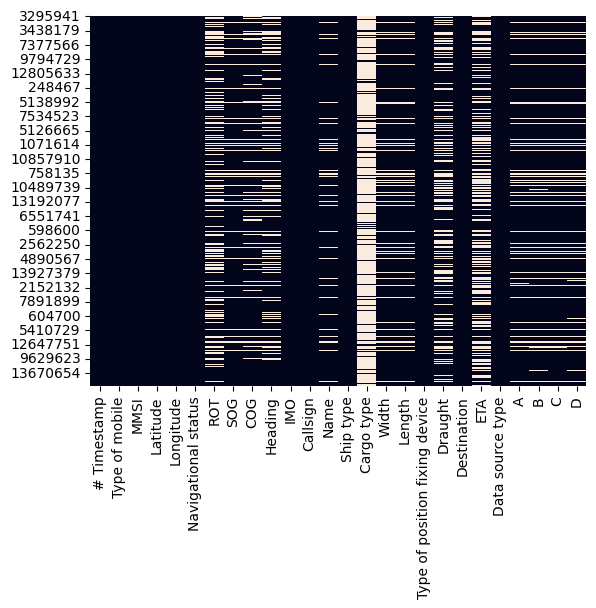

In [ ]:
sample = df.sample(5000, random_state=42)  # 5k rows only
sns.heatmap(sample.isnull(), cbar=False)
plt.show()


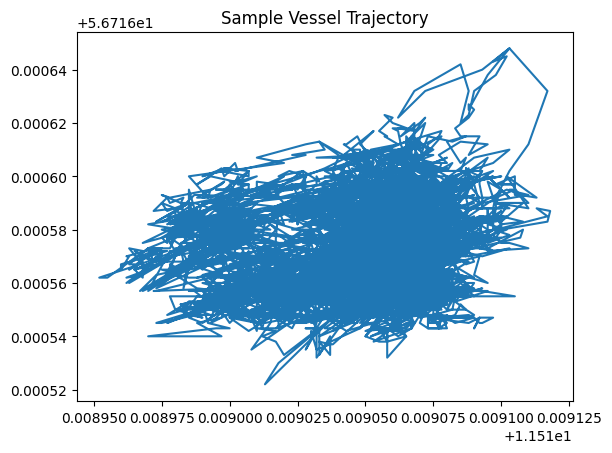

In [ ]:
sample_ship = df[df['MMSI'] == df['MMSI'].iloc[0]]

plt.plot(sample_ship['Longitude'], sample_ship['Latitude'])
plt.title("Sample Vessel Trajectory")
plt.show()


In [75]:
df = df.drop(columns=[
    'ROT',
    'Heading',
    'Name',
    'Callsign',
    'Cargo type',
    'Width',
    'Length',
    'Draught',
    'Destination',
    'ETA',
    'A','B','C','D'
])


In [76]:
df.shape

(14430503, 12)

In [77]:
df['# Timestamp'] = pd.to_datetime(df['# Timestamp'], dayfirst=True)



In [48]:
df = df.sort_values(['MMSI', '# Timestamp'])


In [49]:
df = df[(df['SOG'] >= 0) & (df['SOG'] <= 25)]


In [50]:
df['lat_diff'] = df.groupby('MMSI')['Latitude'].diff()
df['lon_diff'] = df.groupby('MMSI')['Longitude'].diff()
df = df[(df['lat_diff'].abs() < 1) & (df['lon_diff'].abs() < 1)]


In [51]:
df = df[df['Ship type'] == 'Tanker']



In [52]:
vessel_mmsi = df['MMSI'].value_counts().index[0]
vessel = df[df['MMSI'] == vessel_mmsi]

In [53]:
vessel = vessel[
    (vessel['Latitude'] > 54.5) &
    (vessel['Latitude'] < 58.0) &
    (vessel['Longitude'] > 7.5) &
    (vessel['Longitude'] < 15.5)
]

In [54]:
start_time = vessel['# Timestamp'].min()
end_time = vessel['# Timestamp'].max()

duration = end_time - start_time

print(start_time, end_time, duration)

2025-12-31 00:01:39 2025-12-31 23:59:39 0 days 23:58:00


In [55]:
import numpy as np

def haversine_np(lat1, lon1, lat2, lon2):
    R = 6371.0  # km

    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

In [56]:
vessel = vessel.sort_values('# Timestamp').copy()

vessel['dist_km'] = haversine_np(
    vessel['Latitude'].shift(),
    vessel['Longitude'].shift(),
    vessel['Latitude'],
    vessel['Longitude']
)

distance_km = vessel['dist_km'].sum(skipna=True)
print("Distance (km):", distance_km)

Distance (km): 644.9023300890053


In [57]:
vessel_moving = vessel[vessel['SOG'] > 2]

In [58]:
print("Start time:", start_time)
print("End time:", end_time)
print("Duration:", duration)
print("Distance (km):", distance_km)

Start time: 2025-12-31 00:01:39
End time: 2025-12-31 23:59:39
Duration: 0 days 23:58:00
Distance (km): 644.9023300890053


In [59]:
vessel['gap'] = vessel['# Timestamp'].diff()
print(vessel['gap'].max())

0 days 02:09:02


In [60]:
print("Start:", start_time)
print("End:", end_time)
print("Duration:", duration)
print("Distance (km):", distance_km)
print("Max AIS gap:", vessel['gap'].max())

Start: 2025-12-31 00:01:39
End: 2025-12-31 23:59:39
Duration: 0 days 23:58:00
Distance (km): 644.9023300890053
Max AIS gap: 0 days 02:09:02


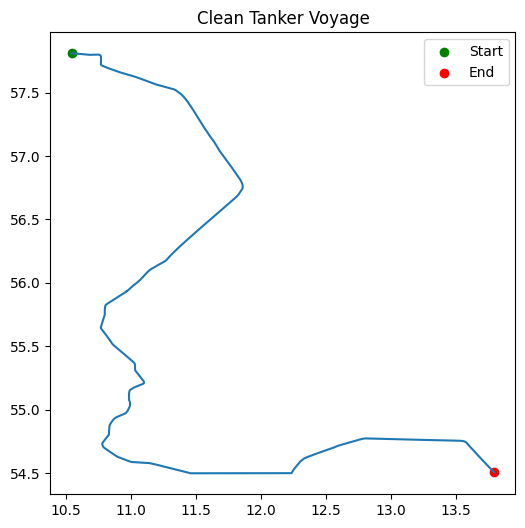

In [61]:
plt.figure(figsize=(6,6))
plt.plot(vessel_moving['Longitude'], vessel_moving['Latitude'])

plt.scatter(vessel_moving.iloc[0]['Longitude'],
            vessel_moving.iloc[0]['Latitude'], color='green', label='Start')

plt.scatter(vessel_moving.iloc[-1]['Longitude'],
            vessel_moving.iloc[-1]['Latitude'], color='red', label='End')

plt.legend()
plt.title("Clean Tanker Voyage")
plt.show()

In [62]:
print("Max AIS gap:", vessel['gap'].max())

Max AIS gap: 0 days 02:09:02


In [63]:
print("Start time:", start_time)
print("End time:", end_time)
print("Duration:", duration)
print("Distance (km):", distance_km)

Start time: 2025-12-31 00:01:39
End time: 2025-12-31 23:59:39
Duration: 0 days 23:58:00
Distance (km): 644.9023300890053


In [64]:
vessel['gap'] = vessel['# Timestamp'].diff()
vessel['gap'].max()

Timedelta('0 days 02:09:02')